In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
df=pd.read_csv("/kaggle/input/nifty50-stock-market-data/NIFTY50_all.csv")

Nifty 50 companies list Keeps shuffling their stocks quarterly at least 2 to 3 stocks are changed. This is the reason we find 65 companies over the 10 years span.

In [3]:
df.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [4]:
df.Symbol.unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [5]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [6]:
df_check=df[df["Deliverable Volume"].isnull()]

In [7]:
df_check

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3322,2000-01-03,ASIANPAINT,EQ,361.20,370.00,390.00,370.00,385.00,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
3323,2000-01-04,ASIANPAINT,EQ,381.65,380.00,392.00,375.00,390.00,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
3324,2000-01-05,ASIANPAINT,EQ,385.55,371.50,390.00,371.50,383.00,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3325,2000-01-06,ASIANPAINT,EQ,383.00,384.90,384.90,374.50,375.10,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
3326,2000-01-07,ASIANPAINT,EQ,377.50,376.00,390.00,370.00,389.00,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231671,2007-02-12,ZEETELE,EQ,361.30,225.25,319.40,225.25,257.00,258.35,265.73,4429894,1.177153e+14,NaN,NaN,NaN
231672,2007-02-13,ZEETELE,EQ,258.35,260.00,276.95,252.25,272.55,267.95,269.91,2689950,7.260378e+13,NaN,NaN,NaN
231673,2007-02-14,ZEETELE,EQ,267.95,272.00,277.00,256.50,265.50,265.50,263.25,2820444,7.424754e+13,NaN,NaN,NaN
231674,2007-02-15,ZEETELE,EQ,265.50,269.90,273.50,265.10,268.00,268.25,268.78,3516748,9.452372e+13,NaN,NaN,NaN


In the DataFrame 'Series' has only 1 unique value as it is representing the type of trade and over the years only equities have been part of the Nifty50. The column Trade represents number of buy/sell order that took place ion the given trading day  and this information became part of the dataset starting from 2011. So essentitally almost decade of the data is missing as it was not part of the data collection. 'VWAP' represents weighted average price of the stock for the day 'Volume Weighted Average Price'



In [8]:
#df.drop(["Trades","Deliverable Volume","%Deliverble","Series"],inplace=True,axis=1)

In [9]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [10]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np
import plotly.graph_objects as go

In [12]:
def view_graph(symbol,price):
    import plotly.graph_objects as go
    df_sample=df[df["Symbol"]==str(symbol)]
    fig = go.Figure([go.Scatter(x=df_sample['Date'], y=df_sample[price])])
    fig.show()


In [13]:
view_graph(symbol='SBIN',price='Last')

In [14]:
from sklearn.preprocessing import MinMaxScaler

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [15]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [16]:
df_RELIANCE = df[df["Symbol"]=='RELIANCE']

In [17]:
df_RELIANCE.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [18]:
#df_SBIN.drop(["Trades","Deliverable Volume","%Deliverble","Series"],inplace=True,axis=1)

In [19]:
features = ["Date", "High", "Volume","Turnover"]
all_data = df_RELIANCE[features]

In [20]:
all_data

,Date,High,Volume,Turnover
Date,,,,
2000-01-03,2000-01-03,251.70,4456424,1.111319e+14
2000-01-04,2000-01-04,271.85,9487878,2.500222e+14
2000-01-05,2000-01-05,287.90,26833684,7.373697e+14
2000-01-06,2000-01-06,300.70,15682286,4.633254e+14
2000-01-07,2000-01-07,317.90,19870977,6.138388e+14
...,...,...,...,...
2021-04-26,2021-04-26,1962.00,9620785,1.867699e+15
2021-04-27,2021-04-27,1997.20,9226547,1.825602e+15
2021-04-28,2021-04-28,2008.00,7902002,1.578508e+15


In [21]:
#setting index
all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

In [22]:
all_data.head()

,High,Volume,Turnover
Date,,,
2000-01-03,251.70,4456424,1.111319e+14
2000-01-04,271.85,9487878,2.500222e+14
2000-01-05,287.90,26833684,7.373697e+14
2000-01-06,300.70,15682286,4.633254e+14
2000-01-07,317.90,19870977,6.138388e+14


In [23]:
all_data.shape

(5306, 3)

In [24]:
#creating training and validation sets
dataset = all_data.values

train = dataset[2000:4500,:]
valid = dataset[4500:,:]

In [25]:
train.shape

(2500, 3)

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [27]:
scaled_data.shape

(5306, 3)

In [28]:
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train.shape

(2410, 90)

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [31]:
x_train.shape

(2410, 90, 1)

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [34]:
model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
19/19 [==============================] - 12s 283ms/step - loss: 0.0503
Epoch 2/100
19/19 [==============================] - 5s 289ms/step - loss: 0.0064
Epoch 3/100
19/19 [==============================] - 5s 282ms/step - loss: 0.0033
Epoch 4/100
19/19 [==============================] - 5s 281ms/step - loss: 0.0031
Epoch 5/100
19/19 [==============================] - 6s 294ms/step - loss: 0.0028
Epoch 6/100
19/19 [==============================] - 5s 281ms/step - loss: 0.0030
Epoch 7/100
19/19 [==============================] - 5s 282ms/step - loss: 0.0028
Epoch 8/100
19/19 [==============================] - 5s 275ms/step - loss: 0.0027
Epoch 9/100
19/19 [==============================] - 5s 280ms/step - loss: 0.0023
Epoch 10/100
19/19 [==============================] - 5s 277ms/step - loss: 0.0022
Epoch 11/100
19/19 [==============================] - 6s 292ms/step - loss: 0.0020
Epoch 12/100
19/19 [==============================] - 5s 278ms/step - loss: 0.0021
Epoch 13/100

In [35]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [36]:
#predicting test data values, using past 90 from the train data
inputs = all_data[len(all_data) - len(valid)-90:].values


In [37]:
inputs

array([[8.52850000e+02, 1.30728530e+07, 1.10072218e+15],
       [8.51050000e+02, 2.31417400e+06, 1.96049373e+14],
       [8.48750000e+02, 3.52872900e+06, 2.96305586e+14],
       ...,
       [2.00800000e+03, 7.90200200e+06, 1.57850761e+15],
       [2.04450000e+03, 8.03591500e+06, 1.62663394e+15],
       [2.03600000e+03, 9.15097400e+06, 1.83953212e+15]])

In [38]:
inputs = inputs.reshape(-1,3)


In [39]:
inputs  = scaler.transform(inputs)

In [40]:
inputs.shape

(896, 3)

In [41]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

In [42]:
X_test


array([[0.20573331, 0.20514861, 0.20440149, ..., 0.23222349, 0.24518434,
        0.25059282],
       [0.20514861, 0.20440149, 0.21211629, ..., 0.24518434, 0.25059282,
        0.24760435],
       [0.20440149, 0.21211629, 0.20535975, ..., 0.25059282, 0.24760435,
        0.24443723],
       ...,
       [0.58323859, 0.5750203 , 0.57672568, ..., 0.55202209, 0.56602241,
        0.57745655],
       [0.5750203 , 0.57672568, 0.57999025, ..., 0.56602241, 0.57745655,
        0.58096476],
       [0.57672568, 0.57999025, 0.57995777, ..., 0.57745655, 0.58096476,
        0.59282118]])

In [43]:
X_test.shape


(806, 90)

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#preds = model.predict(X_test)
#preds = scaler.inverse_transform(preds)

In [45]:
preds = model.predict(X_test)


In [46]:
preds.shape

(806, 1)

In [47]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [48]:
from numpy import int64

z = np.zeros((806,2), dtype=int64)
new_preds=np.append(preds, z, axis=1)

In [49]:
#preds.shape

In [50]:
#preds_new = np.reshape(preds, (preds.shape[0], 3))

In [51]:
predss = scaler.inverse_transform(new_preds)

In [52]:
predss.shape

(806, 3)

In [53]:
predss.shape

(806, 3)

In [54]:
all_data.shape

(5306, 3)

In [55]:
val = all_data.iloc[4500:,:]

In [56]:
val

,High,Volume,Turnover
Date,,,
2018-01-24,981.75,6532672,6.324642e+14
2018-01-25,972.00,6249419,6.024405e+14
2018-01-29,977.30,4524605,4.382895e+14
2018-01-30,965.80,4198139,4.015232e+14
2018-01-31,964.50,5738209,5.501910e+14
...,...,...,...
2021-04-26,1962.00,9620785,1.867699e+15
2021-04-27,1997.20,9226547,1.825602e+15
2021-04-28,2008.00,7902002,1.578508e+15


In [57]:
df_pred = pd.DataFrame(data=predss, columns=["High", "Volume", "Turnover"])


In [58]:
df_pred

,High,Volume,Turnover
0,951.350326,52820.0,4.295543e+12
1,957.797395,52820.0,4.295543e+12
2,965.622266,52820.0,4.295543e+12
3,973.009277,52820.0,4.295543e+12
4,978.170199,52820.0,4.295543e+12
...,...,...,...
801,1910.655697,52820.0,4.295543e+12
802,1910.450919,52820.0,4.295543e+12
803,1920.880289,52820.0,4.295543e+12
804,1940.023369,52820.0,4.295543e+12


In [63]:
vall=val.reset_index(drop=True)

In [59]:
#val

In [60]:
#val.drop("Date",axis=1)

In [64]:
rms=np.sqrt(np.mean(np.power((vall.High - df_pred.High),2)))


In [71]:
df_pred.High

0       951.350326
1       957.797395
2       965.622266
3       973.009277
4       978.170199
          ...     
801    1910.655697
802    1910.450919
803    1920.880289
804    1940.023369
805    1966.075691
Name: High, Length: 806, dtype: float64

In [74]:
val_test = val.reset_index()


In [75]:
val_test

,Date,High,Volume,Turnover,prediciton
0,2018-01-24,981.75,6532672,6.324642e+14,NaN
1,2018-01-25,972.00,6249419,6.024405e+14,NaN
2,2018-01-29,977.30,4524605,4.382895e+14,NaN
3,2018-01-30,965.80,4198139,4.015232e+14,NaN
4,2018-01-31,964.50,5738209,5.501910e+14,NaN
...,...,...,...,...,...
801,2021-04-26,1962.00,9620785,1.867699e+15,NaN
802,2021-04-27,1997.20,9226547,1.825602e+15,NaN
803,2021-04-28,2008.00,7902002,1.578508e+15,NaN
804,2021-04-29,2044.50,8035915,1.626634e+15,NaN


In [76]:
val_test['prediciton'] = df_pred["High"]

In [77]:
val_test

,Date,High,Volume,Turnover,prediciton
0,2018-01-24,981.75,6532672,6.324642e+14,951.350326
1,2018-01-25,972.00,6249419,6.024405e+14,957.797395
2,2018-01-29,977.30,4524605,4.382895e+14,965.622266
3,2018-01-30,965.80,4198139,4.015232e+14,973.009277
4,2018-01-31,964.50,5738209,5.501910e+14,978.170199
...,...,...,...,...,...
801,2021-04-26,1962.00,9620785,1.867699e+15,1910.655697
802,2021-04-27,1997.20,9226547,1.825602e+15,1910.450919
803,2021-04-28,2008.00,7902002,1.578508e+15,1920.880289
804,2021-04-29,2044.50,8035915,1.626634e+15,1940.023369


In [78]:
val_test.set_index('Date',inplace=True)


In [79]:
val_test

,High,Volume,Turnover,prediciton
Date,,,,
2018-01-24,981.75,6532672,6.324642e+14,951.350326
2018-01-25,972.00,6249419,6.024405e+14,957.797395
2018-01-29,977.30,4524605,4.382895e+14,965.622266
2018-01-30,965.80,4198139,4.015232e+14,973.009277
2018-01-31,964.50,5738209,5.501910e+14,978.170199
...,...,...,...,...
2021-04-26,1962.00,9620785,1.867699e+15,1910.655697
2021-04-27,1997.20,9226547,1.825602e+15,1910.450919
2021-04-28,2008.00,7902002,1.578508e+15,1920.880289


In [ ]:
#train=all_data.iloc[2000:4500,:]
#valid=val.VWAP
#valid['Predictions'] = df_pred.VWAP

In [ ]:
#train.reset_index(drop=True, inplace=True)

In [86]:
#valid = all_data[4500:]

In [87]:
#valid

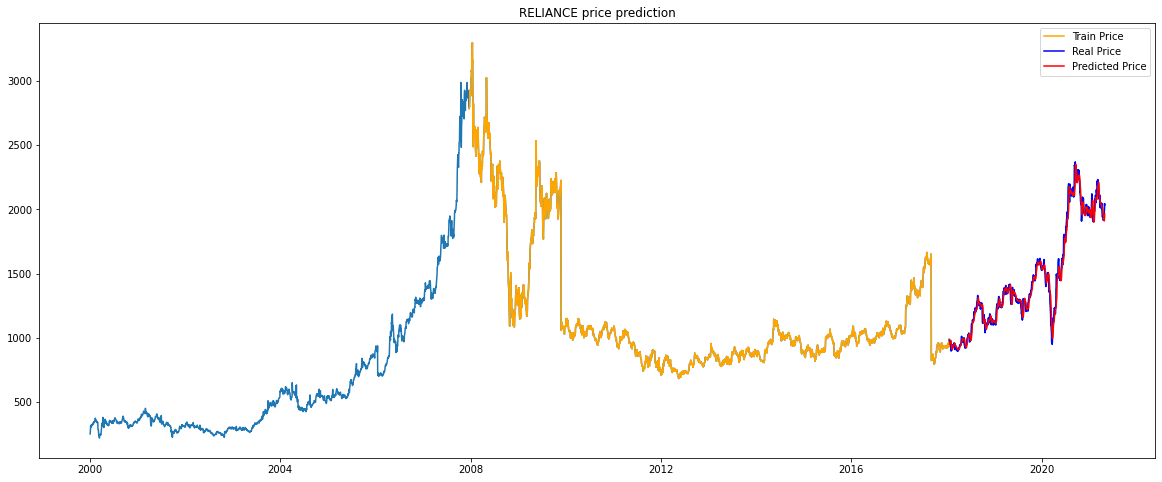

In [89]:
#for plotting
train = all_data[2000:4500]
valid = val_test.High
#valid['Predictions'] = list(cards)
plt.figure(figsize=(20,8))

plt.plot(all_data['High'])
plt.plot(train['High'], color = 'orange', label = 'Train Price')
plt.plot(valid, color = 'blue', label = 'Real Price')
plt.plot(val_test.prediciton, color = 'red', label = 'Predicted Price')
plt.title('RELIANCE price prediction')
plt.legend()
plt.show()